In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

There is a big mess in the rows and columns names. First columns names contains a lot of meaningless things like unnames. Second the values in rows are not standarized anyways -like ResidentId should not contains any NaN value, or movie part are named fully or answered by number. Let's clean some of those stuff.

In [5]:
fan_or_not_question = "Do you consider yourself to be a fan of the Star Trek franchise?"
seen_any_film_question = "Have you seen any of the 6 films in the Star Wars franchise?"
print(star_wars[fan_or_not_question].unique())
print(star_wars[seen_any_film_question].unique())

['Response' 'No' 'Yes' nan]
['Response' 'Yes' 'No']


In [6]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]
yes_no = {
    "Yes": True,
    "No": False
}
star_wars[fan_or_not_question] = star_wars[fan_or_not_question].map(yes_no)
star_wars[seen_any_film_question] = star_wars[seen_any_film_question].map(yes_no)

The name of the columns "Which of the following Star Wars films have you seen? Please select all that apply." contain information whether respondend saw first I episode of the Star Wars. There are differend responses, so we need to convert it to a readable way. Columns Unnamed: 4 to Unnamed: 8 contains information about other series. It is also needed to rename colums by the information they contains.

In [7]:
series_col_names = star_wars.columns[3:9]
print(star_wars[series_col_names[0]].unique())
print(star_wars[series_col_names[1]].unique())
print(star_wars[series_col_names[2]].unique())
print(star_wars[series_col_names[3]].unique())
print(star_wars[series_col_names[4]].unique())
print(star_wars[series_col_names[5]].unique())
       

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [8]:
star_wars_cleaned = star_wars.copy()
for series_question in series_col_names:
    seen_map = {star_wars[series_question].unique()[0]:True,
                np.NaN:False
               }
    star_wars_cleaned[series_question] = star_wars[series_question].map(seen_map)
seen_map = {series_col_names[0]:"seen_1",
            series_col_names[1]:"seen_2",
            series_col_names[2]:"seen_3",
            series_col_names[3]:"seen_4",
            series_col_names[4]:"seen_5",
            series_col_names[5]:"seen_6",
           }
star_wars_cleaned.rename(columns=seen_map,inplace=True)
star_wars_cleaned.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,Yes,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,Yes,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The colmuns "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." and Unamed:10 - Unamed:14 answers the same question as similiar manner as previous columns. Those columns contains numbers and NaN values ,so let converts this number to proper type. 

In [9]:
star_wars_cleaned[star_wars_cleaned.columns[9:15]] = star_wars_cleaned[star_wars_cleaned.columns[9:15]].astype(float)
ranking_map = {star_wars_cleaned.columns[9]:"ranking_1",
            star_wars_cleaned.columns[10]:"ranking_2",
            star_wars_cleaned.columns[11]:"ranking_3",
            star_wars_cleaned.columns[12]:"ranking_4",
            star_wars_cleaned.columns[13]:"ranking_5",
            star_wars_cleaned.columns[14]:"ranking_6",
           }
star_wars_cleaned.rename(columns=ranking_map,inplace=True)
star_wars_cleaned[star_wars_cleaned.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [10]:
ranking = star_wars_cleaned[star_wars_cleaned.columns[9:15]]
ranking_mean = ranking.mean()

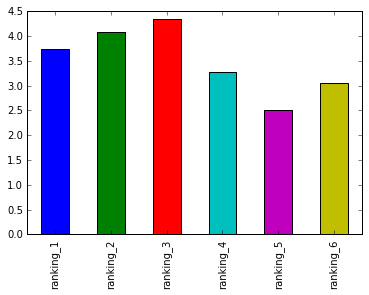

In [11]:
ranking_mean.plot(kind="bar")

For most of the respondends "Star Wars: Episode V - The Empire Strikes Back" was the best. The score is the highest from the series also in imdb site. The worst of the series is not the lowest score in imdb.

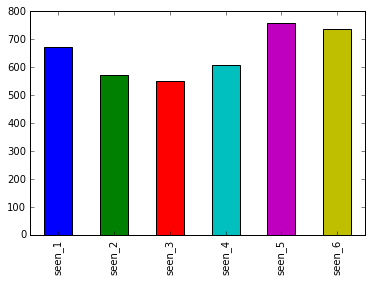

In [12]:
series_seen = star_wars_cleaned.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
series_seen.plot(kind='bar')

The number of responders who have watched episode correspond with the rate for episode. The decision about watching or not episode could be biased by rating of the episode.

In [13]:
males = star_wars_cleaned[star_wars_cleaned["Gender"] == "Male"]
females = star_wars_cleaned[star_wars_cleaned["Gender"] == "Female"]

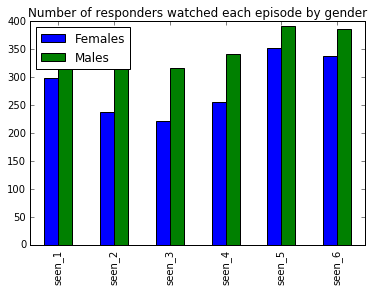

In [14]:
males_episode = males.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
females_episode = females.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()

males_females_episodes = pd.DataFrame({"Males":males_episode ,"Females":females_episode })
males_females_episodes.plot(kind='bar',title="Number of responders watched each episode by gender")


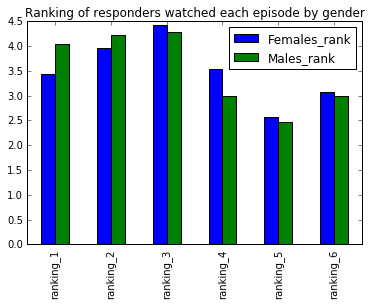

In [15]:
males_ranking = males.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].mean()
females_ranking = females.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].mean()
males_females_ranking = pd.DataFrame({"Males_rank":males_ranking ,"Females_rank":females_ranking })
males_females_ranking.plot(kind='bar',title="Ranking of responders watched each episode by gender")

In [16]:
fans = star_wars_cleaned[star_wars_cleaned["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "Yes"]
not_fans = star_wars_cleaned[star_wars_cleaned["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "No"]

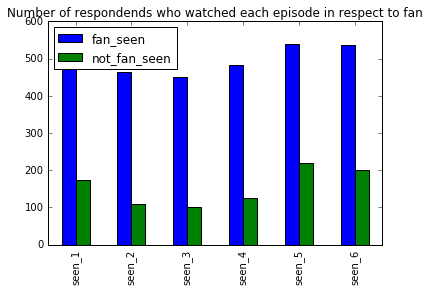

In [17]:
fans_episode = fans.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
not_fans_episode = not_fans.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
split_fan_episodes = pd.DataFrame({"fan_seen":fans_episode ,"not_fan_seen":not_fans_episode})
split_fan_episodes.plot(kind='bar',title="Number of respondends who watched each episode in respect to fan")

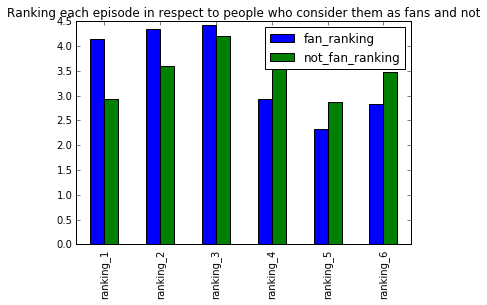

In [18]:
fans_ranking = fans.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].mean()
not_fans_ranking = not_fans.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].mean()
split_fan_ranking = pd.DataFrame({"fan_ranking":fans_ranking ,"not_fan_ranking":not_fans_ranking})
split_fan_ranking.plot(kind='bar',title="Ranking each episode in respect to people who consider them as fans and not")

The most rated episode have been watched aproximately by the same number of men and females. It is not the case for less popular ones. The scores are similiar for man and women.

People who watched episodes consider themselfs as a fan of star wars. It is interesting that responders who says that they are fans scored worse the firsts episodes than not fans. 

In [26]:
fans_trek = star_wars_cleaned[star_wars_cleaned["Do you consider yourself to be a fan of the Star Trek franchise?"] == True]
not_fans_trek = star_wars_cleaned[star_wars_cleaned["Do you consider yourself to be a fan of the Star Trek franchise?"] == False]


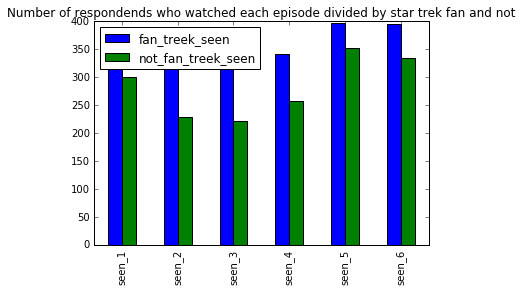

In [30]:
fans_trek_episode = fans_trek.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
not_fans_trek_episode = not_fans_trek.loc[:,star_wars_cleaned.columns.str.contains("seen_")].sum()
split_fan_treek_episodes = pd.DataFrame({"fan_treek_seen":fans_trek_episode ,"not_fan_treek_seen":not_fans_trek_episode})
split_fan_treek_episodes.plot(kind='bar',title="Number of respondends who watched each episode divided by star trek fan and not")

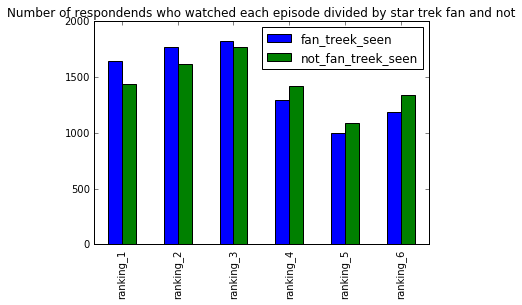

In [29]:
fans_trek_ranking = fans_trek.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].sum()
not_fans_trek_ranking = not_fans_trek.loc[:,star_wars_cleaned.columns.str.contains("ranking_")].sum()
split_fan_treek_ranking = pd.DataFrame({"fan_treek_seen":fans_trek_ranking ,"not_fan_treek_seen":not_fans_trek_ranking})
split_fan_treek_ranking.plot(kind='bar',title="Number of respondends who watched each episode divided by star trek fan and not")

Much more Star Trek fans watched firsts episodes films than not fans. The difference is not so big as the difference beetween movie fans and not. There is not big discrepancies in rankings in Star Trek fans and not fans (like in film fans).  

In [31]:
star_wars_cleaned["Education"].unique()

array(['High school degree', 'Bachelor degree',
       'Some college or Associate degree', nan, 'Graduate degree',
       'Less than high school degree'], dtype=object)

In [32]:
star_wars_cleaned["Location (Census Region)"].unique()

array(['South Atlantic', 'West South Central', 'West North Central',
       'Middle Atlantic', 'East North Central', 'Pacific', nan,
       'Mountain', 'New England', 'East South Central'], dtype=object)

In [33]:
star_wars_cleaned["Which character shot first?"].unique()

array(["I don't understand this question", nan, 'Greedo', 'Han'],
      dtype=object)

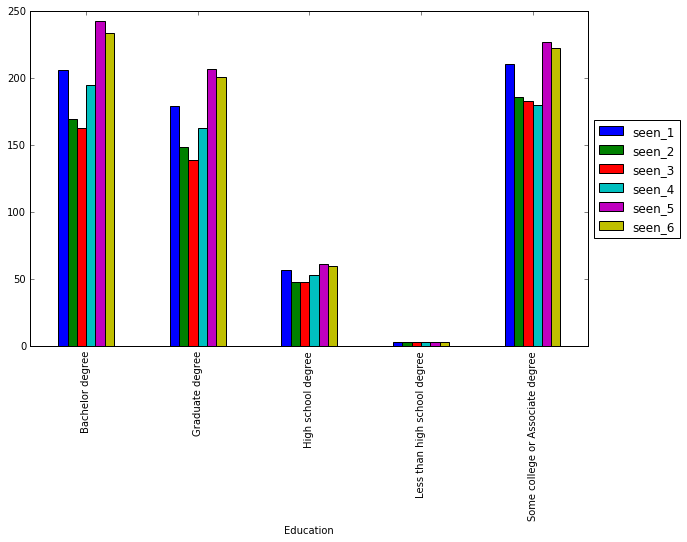

In [70]:
sum_education = star_wars_cleaned.groupby("Education").sum()
seen_education = sum_education.loc[:,sum_education.columns.str.contains("seen_")]
ax = seen_education.plot(kind='bar',figsize=(10,6),legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

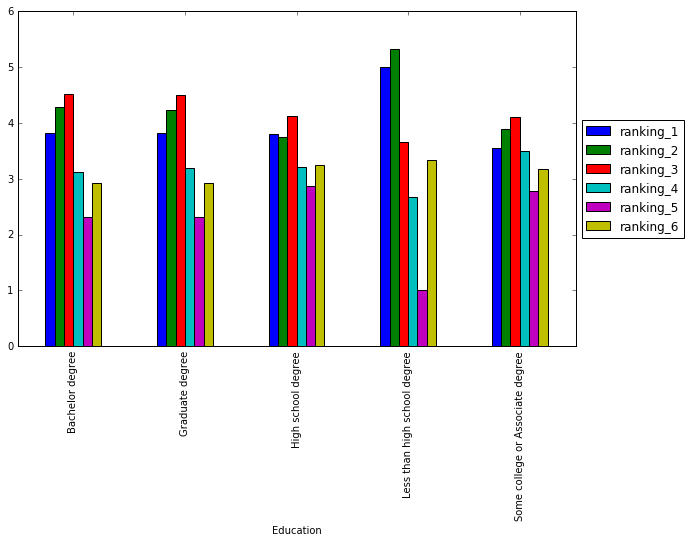

In [71]:
mean_education = star_wars_cleaned.groupby("Education").mean()
ranking_education = mean_education.loc[:,mean_education.columns.str.contains("ranking_")]
ax = ranking_education.plot(kind='bar',figsize=(10,6),legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Most people who have watched Star Wars has some type of college degree. There are not many people who watched film and has less than high school degree. It is probably related to the age of the film and age of those people. 

There are lot of differences with ranking. People who has some type of degrees(bachelor, graduate or associate) has similiar rating scores. It is visible that people with less than high school degree scored the 5 episodes much better than any episodes. They also scored it much better than any other educational group. The variance between each of the episodes are much higher. 

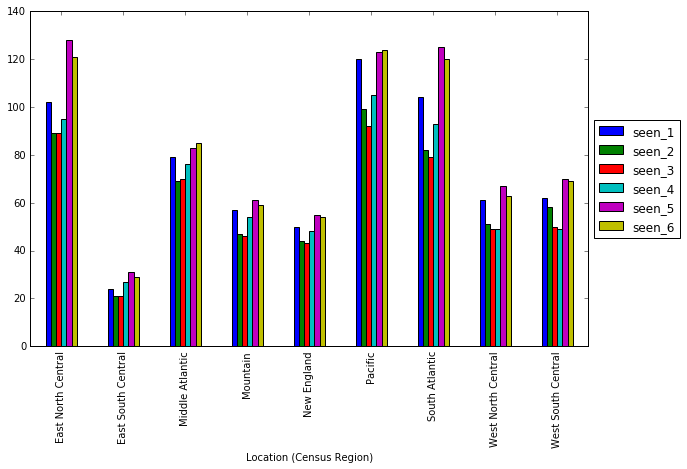

In [72]:
sum_location = star_wars_cleaned.groupby("Location (Census Region)").sum()
seen_location = sum_location.loc[:,sum_location.columns.str.contains("seen_")]
ax = seen_location.plot(kind='bar',figsize=(10,6),legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

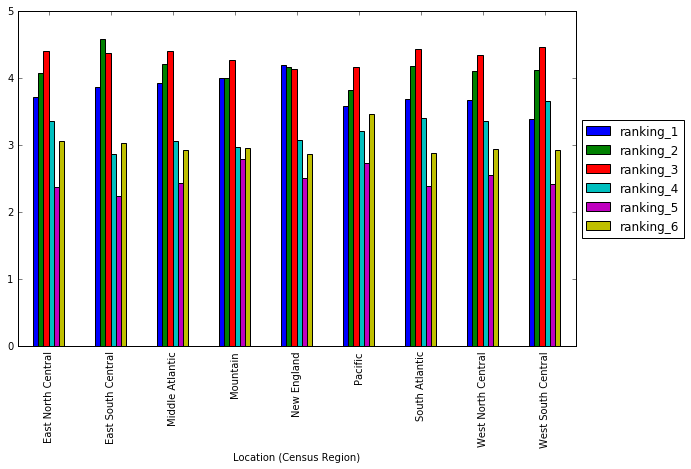

In [74]:
mean_location = star_wars_cleaned.groupby("Location (Census Region)").mean()
ranking_location = mean_location.loc[:,mean_location.columns.str.contains("ranking_")]
ax = ranking_location.plot(kind='bar',figsize=(10,6),legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))